# 画像から顔を切り出す

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## データの読み込みなど

In [15]:
img1_path = "../data/aragaki_00.jpeg"
img2_path = "../data/hoshino_01.jpg"
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# 顔の特徴量を読み込む
face_cascade = cv2.CascadeClassifier('../data/haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [16]:
# 画像を複数プロットする
def plot_img_list(img_list):
    for img in img_list:
        plt.imshow(img)
        plt.show()

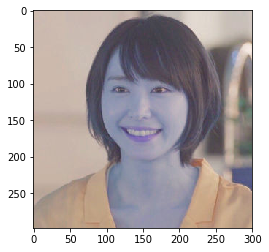

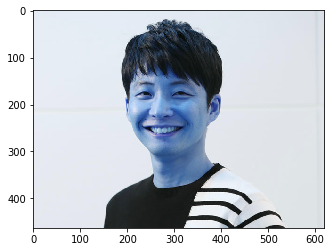

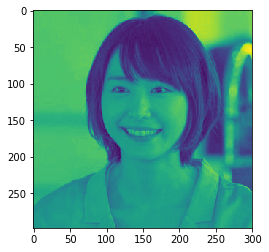

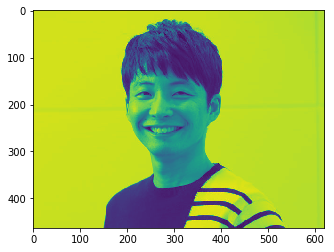

In [17]:
plot_img_list([img1, img2, img1_gray, img2_gray])

## 顔の切り出し

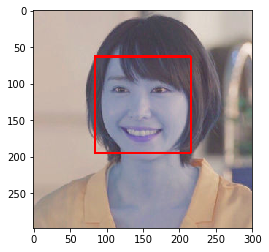

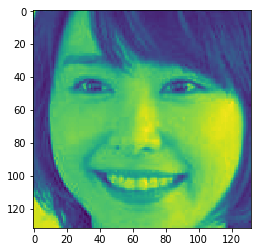

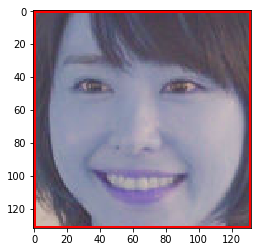

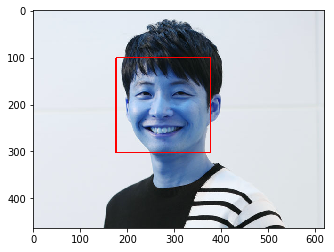

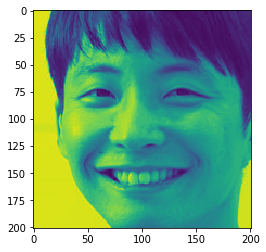

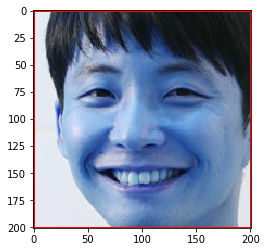

In [19]:
img1_faces = face_cascade.detectMultiScale(img1_gray, 1.3, 5)
for (x1,y1,w1,h1) in img1_faces:
    cv2.rectangle(img1,(x1,y1),(x1+w1,y1+h1),(255,0,0),2)
    img1_roi_gray = img1_gray[y1:y1+h1, x1:x1+w1]
    img1_roi_color = img1[y1:y1+h1, x1:x1+w1]
plot_img_list([img1, img1_roi_gray, img1_roi_color])

img2_faces = face_cascade.detectMultiScale(img2_gray, 1.3, 5)
for (x2,y2,w2,h2) in img2_faces:
    cv2.rectangle(img2,(x2,y2),(x2+w2,y2+h2),(255,0,0),2)
    img2_roi_gray = img2_gray[y2:y2+h2, x2:x2+w2]
    img2_roi_color = img2[y2:y2+h2, x2:x2+w2]
plot_img_list([img2, img2_roi_gray, img2_roi_color])

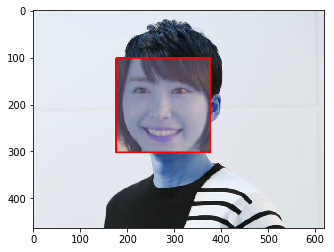

In [26]:
# plot_img_list([img2[y2:y2+h2, x2:x2+w2]])
hoshino_aragaki = img2
aragaki_face = img1[y1:y1+h1, x1:x1+w1]
hoshino_face = img2[y2:y2+h2, x2:x2+w2]
aragaki_face = cv2.resize(aragaki_face, (hoshino_face.shape[:2]))
hoshino_aragaki[y2:y2+h2, x2:x2+w2] = aragaki_face
plot_img_list([hoshino_aragaki])
cv2.

In [29]:
# cv2.imwrite(hoshino_aragaki, "../data/hoshino_aragaki.jpg")

TypeError: bad argument type for built-in operation